<a href="https://colab.research.google.com/github/erneyurrego-art/Introducci-n-a-la-IA/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepocesado

- Limpieza de los datos.
- Preprocesado de los datos

### Bibliotecas a utilizar

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

### Cargar el dataset

In [14]:
try:
    d = pd.read_csv('train.csv', on_bad_lines='skip')
    display(d.head())
except Exception as e:
    print(f"An error occurred: {e}")

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [15]:
periodo = d['PERIODO_ACADEMICO'].unique()
periodo = sorted(periodo)
print(periodo)

[np.int64(20183), np.int64(20184), np.int64(20194), np.int64(20195), np.int64(20196), np.int64(20202), np.int64(20203), np.int64(20212), np.int64(20213)]


Eliminar variables que no le aportan peso al dataset, en el cual se encuentra F_TIENEINTERNET.1 e ID, ya que la primera es una columna duplicada, y ID no aporta ninguna información para el modelo de Machine Learning, ya que son los identificadores de los registros del dataset.

In [16]:
print(d['F_TIENEINTERNET'].equals(d['F_TIENEINTERNET.1']))

True


In [17]:
try:
    d = d.drop(columns=['F_TIENEINTERNET.1', 'ID'])
    display(d.head(4))
except:
    display(d.head(4))

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190


In [18]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO_ACADEMICO            692500 non-null  int64  
 1   E_PRGM_ACADEMICO             692500 non-null  object 
 2   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 3   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 4   E_HORASSEMANATRABAJA         661643 non-null  object 
 5   F_ESTRATOVIVIENDA            660363 non-null  object 
 6   F_TIENEINTERNET              665871 non-null  object 
 7   F_EDUCACIONPADRE             669322 non-null  object 
 8   F_TIENELAVADORA              652727 non-null  object 
 9   F_TIENEAUTOMOVIL             648877 non-null  object 
 10  E_PRIVADO_LIBERTAD           692500 non-null  object 
 11  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 12  F_TIENECOMPUTADOR            654397 non-null  object 
 13 

In [19]:
d.head(4)
nullValues = d.isnull().sum()
print("Valores nulos totales por columna", nullValues)

Valores nulos totales por columna PERIODO_ACADEMICO                  0
E_PRGM_ACADEMICO                   0
E_PRGM_DEPARTAMENTO                0
E_VALORMATRICULAUNIVERSIDAD     6287
E_HORASSEMANATRABAJA           30857
F_ESTRATOVIVIENDA              32137
F_TIENEINTERNET                26629
F_EDUCACIONPADRE               23178
F_TIENELAVADORA                39773
F_TIENEAUTOMOVIL               43623
E_PRIVADO_LIBERTAD                 0
E_PAGOMATRICULAPROPIO           6498
F_TIENECOMPUTADOR              38103
F_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                 0
INDICADOR_1                        0
INDICADOR_2                        0
INDICADOR_3                        0
INDICADOR_4                        0
dtype: int64


Visualizar el porcentaje de valores nulos de todas las columnas para determinar si hay columnas que se deben de eliminar. En este caso, tienen un nivel de porcentaje de valores nulos aceptable y que se pueden rellenar o hacerle algún tratamiento; en este caso puede ser la moda, ya que son variables categóricas.

In [20]:
print("Porcentaje de valores nulos por columna")
print(d.isnull().mean()*100)


Porcentaje de valores nulos por columna
PERIODO_ACADEMICO              0.000000
E_PRGM_ACADEMICO               0.000000
E_PRGM_DEPARTAMENTO            0.000000
E_VALORMATRICULAUNIVERSIDAD    0.907870
E_HORASSEMANATRABAJA           4.455884
F_ESTRATOVIVIENDA              4.640722
F_TIENEINTERNET                3.845343
F_EDUCACIONPADRE               3.347004
F_TIENELAVADORA                5.743394
F_TIENEAUTOMOVIL               6.299350
E_PRIVADO_LIBERTAD             0.000000
E_PAGOMATRICULAPROPIO          0.938339
F_TIENECOMPUTADOR              5.502238
F_EDUCACIONMADRE               3.417184
RENDIMIENTO_GLOBAL             0.000000
INDICADOR_1                    0.000000
INDICADOR_2                    0.000000
INDICADOR_3                    0.000000
INDICADOR_4                    0.000000
dtype: float64


### limpieza de variables

Con lo mencionado anteriormente, se procede a rellenar todas las categorías con valores nulos menores al 0,07 %. Si sobran categorías que no cumplan con esta condición, se procederá a rellenarlas o darles un tratamiento especial, aunque no será necesario, ya que el límite para aplicar un tratamiento especial es para categorías con un porcentaje mayor al 0,1 % de valores nulos.

In [21]:
cols_to_fill = nullValues[nullValues/len(d) < 0.07].index.intersection(d.columns)

for col in cols_to_fill:
    d[col] = d[col].fillna(d[col].mode()[0])

print("Valores despues del llenado:")
print(d.isnull().sum())

Valores despues del llenado:
PERIODO_ACADEMICO              0
E_PRGM_ACADEMICO               0
E_PRGM_DEPARTAMENTO            0
E_VALORMATRICULAUNIVERSIDAD    0
E_HORASSEMANATRABAJA           0
F_ESTRATOVIVIENDA              0
F_TIENEINTERNET                0
F_EDUCACIONPADRE               0
F_TIENELAVADORA                0
F_TIENEAUTOMOVIL               0
E_PRIVADO_LIBERTAD             0
E_PAGOMATRICULAPROPIO          0
F_TIENECOMPUTADOR              0
F_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL             0
INDICADOR_1                    0
INDICADOR_2                    0
INDICADOR_3                    0
INDICADOR_4                    0
dtype: int64


En estas variables hice lo siguiente: en el caso de F_EDUCACIONMADRE y F_EDUCACIONPADRE, tienen dos categorías que son "No sabe" y "No aplica", que realmente se pueden englobar en una sola categoría. En el caso de E_PRGM_ACADEMICO, tiene muchas categorías con un nivel de frecuencia muy bajo; por esta razón, las categorías menores o iguales a $0.01$ se englobarán en una sola categoría, y de esta manera, será una variable más manejable al momento de hacer la transformación.

In [22]:
d[['F_EDUCACIONMADRE', 'F_EDUCACIONPADRE']] = d[['F_EDUCACIONMADRE', 'F_EDUCACIONPADRE']].replace({
    'No sabe': 'Ninguno',
    'No Aplica': 'Ninguno'
})


En esta columna en especial, que es E_PRGM_ACADEMICO, encontramos un nivel muy grande de diferentes categorías. Por esta razón, decidí reducir la cantidad de aquellas con una frecuencia menor al 0,01. De esta manera, a la hora de hacer la conversión de esta columna, el proceso será mucho más práctico.

In [23]:
frec = d['E_PRGM_ACADEMICO'].value_counts(normalize=True)
main_categories = frec[frec > 0.01].index
d['E_PRGM_ACADEMICO'] = d['E_PRGM_ACADEMICO'].apply(lambda x: x if x in main_categories else 'OTRA')

In [24]:
d['E_PRGM_ACADEMICO'].value_counts() # hubo una reducción significativa

,count
E_PRGM_ACADEMICO,
OTRA,291391
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
ADMINISTRACIÓN DE EMPRESAS,24777
INGENIERIA CIVIL,19487
MEDICINA,18099


In [25]:
''' cols_to_fill2 = nullValues[nullValues/len(d) > 0.05].index.intersection(d.columns)

for col in cols_to_fill2:
    d[col] = d[col].fillna("Sin informacion")

print("Valores despues del llenado:")
print(d.isnull().sum()) '''

' cols_to_fill2 = nullValues[nullValues/len(d) > 0.05].index.intersection(d.columns)\n\nfor col in cols_to_fill2:\n    d[col] = d[col].fillna("Sin informacion")\n\nprint("Valores despues del llenado:")\nprint(d.isnull().sum()) '

### Preprocesado variables

Para las variables E_PRGM_ACADEMICO y E_PRGM_DEPARTAMENTO, les apliqué una conversión usando One-Hot Encoding, ya que son categorías no ordenadas, además de que el número de sus categorías es mayor a 20.

In [26]:
def one_hot_columns(d, columns):
    return pd.get_dummies(d, columns=columns, dtype=int)

In [27]:
columns_for_one_hot = ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO']
d = one_hot_columns(d, columns_for_one_hot)


Para columnas del tipo ordinal que tienen un orden y, además, sus categorías tienen menos de 10, se pueden convertir con manual mapping u Ordinal Encoder con scikit-learn. En este caso, apliqué ambas para probar diferentes métodos de conversión y ver cómo se comporta el modelo.

In [28]:
extract_mapping = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

d['F_ESTRATOVIVIENDA'] = d['F_ESTRATOVIVIENDA'].replace(extract_mapping)

/tmp/ipython-input-1778904175.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['F_ESTRATOVIVIENDA'] = d['F_ESTRATOVIVIENDA'].replace(extract_mapping)


In [29]:
educational_level_order = [
    'Ninguno',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado'
]

payment_order = [
    'No pagó matrícula',
    'Menos de 500 mil',
    'Entre 500 mil y menos de 1 millón',
    'Entre 1 millón y menos de 2.5 millones',
    'Entre 2.5 millones y menos de 4 millones',
    'Entre 4 millones y menos de 5.5 millones',
    'Entre 5.5 millones y menos de 7 millones',
    'Más de 7 millones'
]

hours_order = [
    '0',
    'Menos de 10 horas',
    'Entre 11 y 20 horas',
    'Entre 21 y 30 horas',
    'Más de 30 horas'
]


In [30]:
def encode_ordinal_columns(d, transformer_column, order):
    encoder = OrdinalEncoder(categories=[order])
    d[transformer_column] = encoder.fit_transform(d[[transformer_column]])
    return d

encode_ordinal_columns(d, 'E_HORASSEMANATRABAJA', hours_order)
encode_ordinal_columns(d, 'E_VALORMATRICULAUNIVERSIDAD', payment_order)
encode_ordinal_columns(d, 'F_EDUCACIONMADRE', educational_level_order)
encode_ordinal_columns(d, 'F_EDUCACIONPADRE', educational_level_order)


,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_PUTUMAYO,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SAN ANDRES,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES
0,20212,6.0,1.0,3,Si,5.0,Si,Si,N,No,...,0,0,0,0,0,0,0,0,0,0
1,20212,4.0,0.0,3,No,6.0,Si,No,N,No,...,0,0,0,0,0,0,0,0,0,0
2,20203,4.0,4.0,3,Si,4.0,Si,No,N,No,...,0,0,0,0,0,0,0,0,0,0
3,20195,5.0,0.0,4,Si,0.0,Si,No,N,No,...,0,0,0,0,0,1,0,0,0,0
4,20212,4.0,3.0,3,Si,2.0,Si,Si,N,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,2.0,2.0,2,Si,4.0,Si,No,N,Si,...,0,0,0,0,0,0,0,0,0,0
692496,20212,4.0,4.0,3,Si,1.0,Si,No,N,No,...,1,0,0,0,0,0,0,0,0,0
692497,20183,3.0,1.0,3,Si,4.0,Si,No,N,Si,...,0,0,0,0,0,0,0,0,0,0
692498,20195,4.0,1.0,1,No,2.0,No,No,N,Si,...,0,0,0,0,0,0,0,1,0,0


Y para las variables binarias, utilicé el método de codificación binaria, ya que los valores que se manejan son "SÍ" y "NO", que luego con este método de transformación se convertirán en 0 y 1.

In [31]:
def replace_binary_columns(d, columns, mapping):
  for col in columns:
    d[col] = d[col].map(mapping)

  return d

In [32]:
cols_si_no = ['F_TIENEINTERNET', 'F_TIENEAUTOMOVIL', 'F_TIENECOMPUTADOR', 'E_PAGOMATRICULAPROPIO', 'F_TIENELAVADORA']
cols_s_n = ['E_PRIVADO_LIBERTAD']

In [33]:
d = replace_binary_columns(d, cols_si_no, {'No': 0, 'Si': 1})
d = replace_binary_columns(d, cols_s_n, {'N': 0, 'S': 1})

In [34]:
# transformación variable objetivo:

In [35]:
orden_rendimiento = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

d['RENDIMIENTO_GLOBAL'] = d['RENDIMIENTO_GLOBAL'].replace(orden_rendimiento)

/tmp/ipython-input-3551991104.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['RENDIMIENTO_GLOBAL'] = d['RENDIMIENTO_GLOBAL'].replace(orden_rendimiento)


In [36]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 69 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   PERIODO_ACADEMICO                                     692500 non-null  int64  
 1   E_VALORMATRICULAUNIVERSIDAD                           692500 non-null  float64
 2   E_HORASSEMANATRABAJA                                  692500 non-null  float64
 3   F_ESTRATOVIVIENDA                                     692500 non-null  int64  
 4   F_TIENEINTERNET                                       692500 non-null  int64  
 5   F_EDUCACIONPADRE                                      692500 non-null  float64
 6   F_TIENELAVADORA                                       692500 non-null  int64  
 7   F_TIENEAUTOMOVIL                                      692500 non-null  int64  
 8   E_PRIVADO_LIBERTAD                          

### Preprocesado variables númericas

Para finalizar se hara un analisis corto de las variables númericas del dataset aunque es más para recordar el estado de estas y ver que todo se encuentre bien y que no se haya saltado algo relevante.

In [37]:
d[['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']].describe()

,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,692500.000000,692500.000000,692500.000000,692500.000000
mean,0.268629,0.259996,0.262087,0.262903
std,0.122130,0.093480,0.058862,0.067944
min,0.000000,0.000000,0.000000,0.000000
25%,0.203000,0.212000,0.254000,0.255000
50%,0.240000,0.271000,0.276000,0.285000
75%,0.314000,0.309000,0.293000,0.303000
max,0.657000,0.487000,0.320000,0.332000


Boxplot para odemtofocar valores irregulares

Por el lado de las variables numéricas que venían con el dataset original sin transformar, están bien, ya que en sí son proporciones. Hay algunos outliers, pero son moderados y se ve que hay consistencia entre los cuatro indicadores; entonces, en este caso está bien. Por esta razon, no hay que hacerle ninguna limpieza o transformación.

Text(0, 0.5, 'Valores')

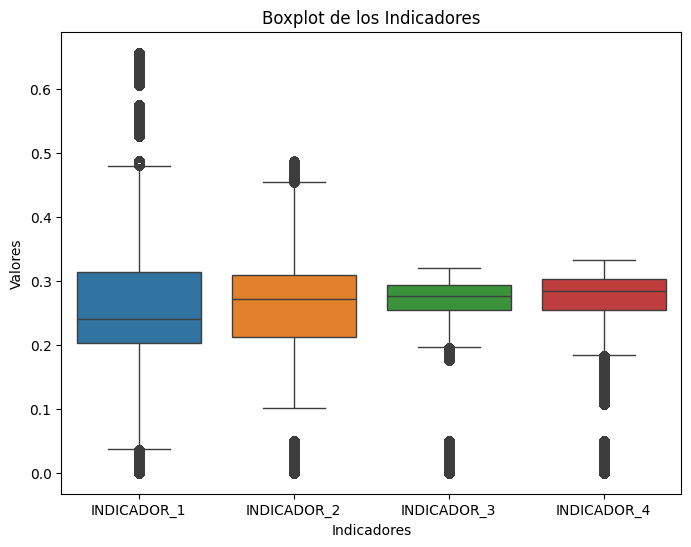

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=d[['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']])
plt.title('Boxplot de los Indicadores')
plt.xlabel('Indicadores')
plt.ylabel('Valores')

### EDA

Luego de esto quiero hacer un analisis EDA simple para ver como se comporta un poco la variable objectivo con las demás variables ahora que ya estan transformadas.


In [40]:
d.head(2)

,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_PUTUMAYO,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SAN ANDRES,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES
0,20212,6.0,1.0,3,1,5.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20212,4.0,0.0,3,0,6.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Un mapa de correlapción que puede que no nos ayude mucho por la cantidad de columnas que tenemos actualmente con el modelo transformado pero nos puede ayudar como referente al proximo analisis.

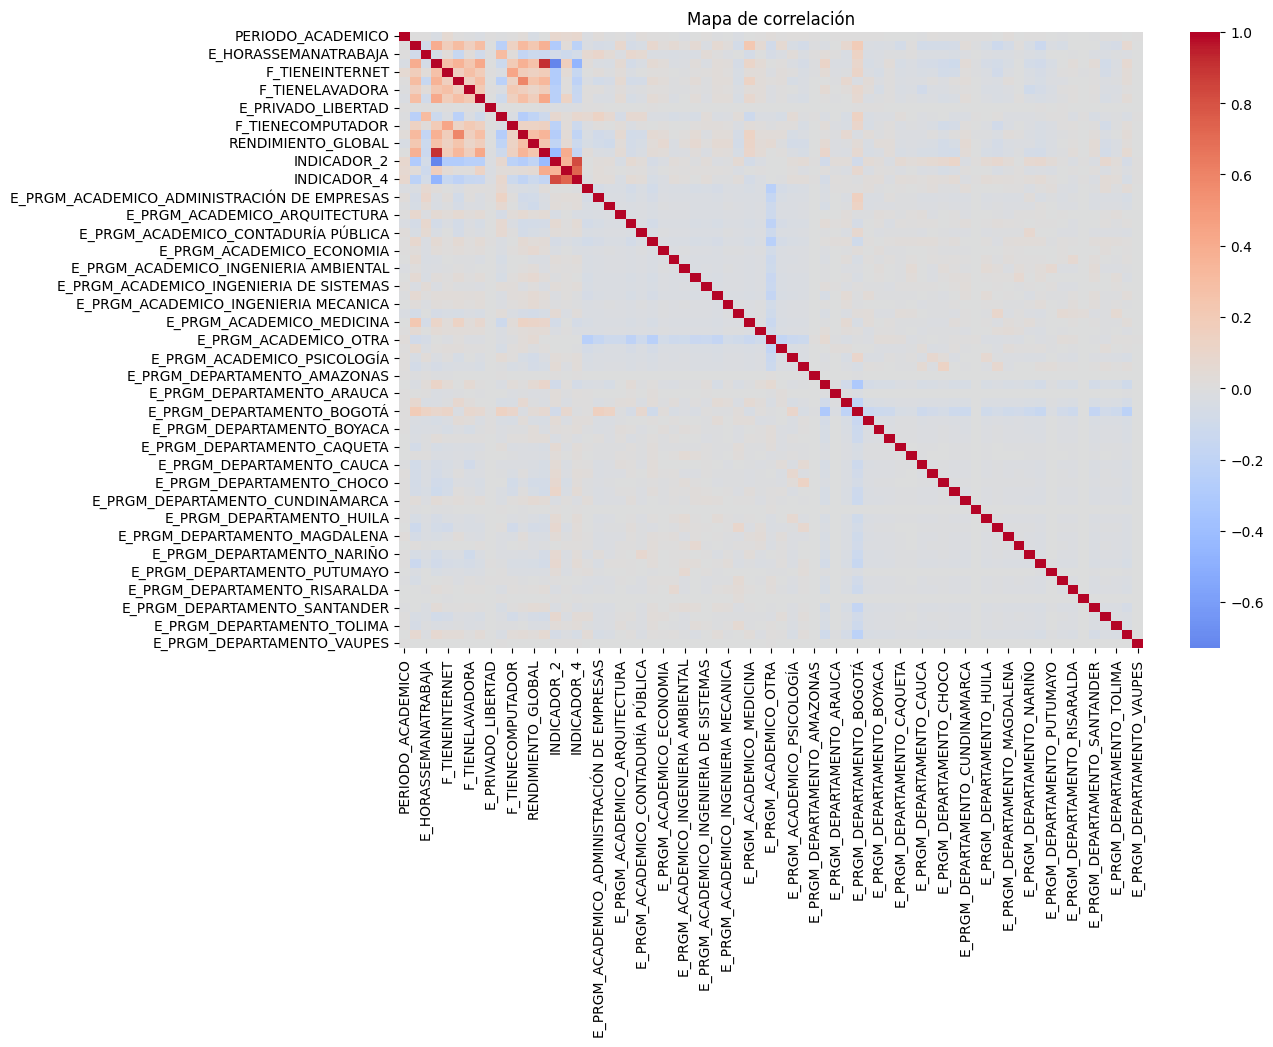

In [42]:
# Mapa de correlación

plt.figure(figsize=(12, 8))
corr = d.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, center=0)
plt.title("Mapa de correlación")
plt.show()

Con el balence de variable objetivo se ve que hay un equilibrio de las clases y esto nos ayuda a que no hay un sesgo en el modelo al haber una categoría dominante.



RENDIMIENTO_GLOBAL
3    25.360144
0    24.980072
1    24.877256
2    24.782527
Name: proportion, dtype: float64


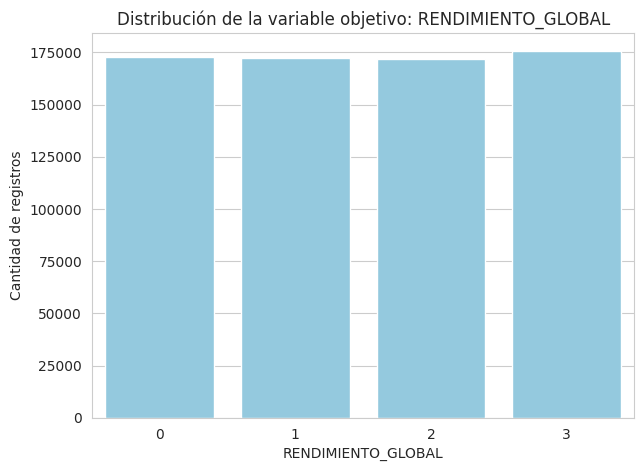

In [43]:
obj = "RENDIMIENTO_GLOBAL"
print(d[obj].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
sns.countplot(x=obj, data=d, color="skyblue")
plt.title(f"Distribución de la variable objetivo: {obj}")
plt.ylabel("Cantidad de registros")
plt.show()

Vemos que la correlación entre la variable objectivo esta entre -0.2 y 0.2, esto nos indica que el modelo de machine learning no puede ser una clasificación lineal si no algo más guiado hacia un arbol de decisión, random forest o un XGBoots. Esencial para el siguiente paso que es el entrenamiento del modelo.

In [54]:
corr_obj = corr[obj].sort_values(ascending=False)
print("Correlación de las variables con la variable objectivo")

bins = np.array([-1, -0.3, 0.3, 1])
labels = np.array(["Negativa", "Débil o Nula", "Positiva"])

corr_df = corr_obj.to_frame(name="correlación")
corr_df["categoria"] = pd.cut(corr_df["correlación"], bins=bins, labels=labels)

corr_df


Correlación de las variables con la variable objectivo


,correlación,categoria
RENDIMIENTO_GLOBAL,1.000000,Positiva
F_EDUCACIONMADRE,0.280075,Débil o Nula
F_ESTRATOVIVIENDA,0.261059,Débil o Nula
F_EDUCACIONPADRE,0.246944,Débil o Nula
INDICADOR_1,0.242854,Débil o Nula
...,...,...
E_PRGM_ACADEMICO_ADMINISTRACIÓN EN SALUD OCUPACIONAL,-0.096030,Débil o Nula
E_HORASSEMANATRABAJA,-0.114693,Débil o Nula
INDICADOR_4,-0.119497,Débil o Nula
INDICADOR_2,-0.190022,Débil o Nula


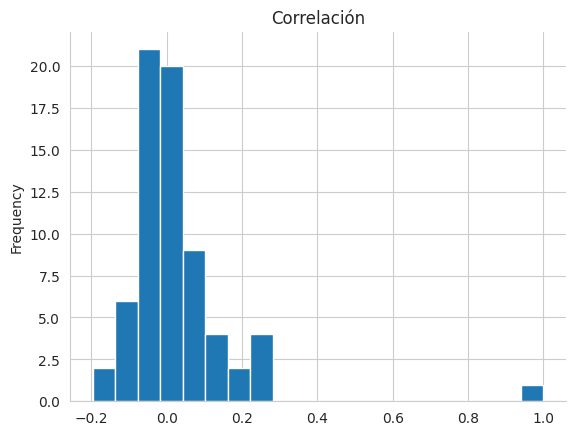

In [58]:
corr_df['correlación'].plot(kind='hist', bins=20, title='Correlación')
plt.gca().spines[['top', 'right',]].set_visible(False)